<a href="https://colab.research.google.com/github/xu0841/ISYE645_StochasticLP_share_bike/blob/main/ISYE_645_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the required packages
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
import math
from scipy.stats import poisson
import random
import copy
!pip install pyDOE
from pyDOE import *
import scipy
!pip install gurobipy
from gurobipy import *

  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18184 sha256=ecabdbd1e0bb49214c14fc91d367552ac4744312fffea6a4db3717e9838f0c7e
  Stored in directory: /root/.cache/pip/wheels/83/ce/8a/87b25c685bfeca1872d13b8dc101e087a9c6e3fb5ebb47022a
Successfully built pyDOE
     |████████████████████████████████| 11.5 MB 7.7 MB/s 


In [ ]:
demand=pd.read_excel("Project_CustomerDemand.xlsx")

In [ ]:
demand=demand.iloc[1:26,0:3]

In [ ]:
demand.columns=demand.iloc[0,:]
demand.drop(1)

1,NaN,Station A to B,Station B to A
2,00:00:00,5,4
3,01:00:00,2,3
4,02:00:00,4,2
5,03:00:00,3,1
6,04:00:00,1,2
7,05:00:00,1,5
8,06:00:00,17,11
9,07:00:00,16,9
10,08:00:00,20,7
11,09:00:00,18,10


In [ ]:
d=demand[['Station A to B','Station B to A']].values.tolist()[1:25]

In [ ]:
sample_demand=pd.read_excel("Demand samples.xlsx")

In [ ]:
sample_demand

,Unnamed: 0,Sample 1,Unnamed: 2,Sample 2,Unnamed: 4,Sample 3,Unnamed: 6,Sample 4,Unnamed: 8,Sample 5,Unnamed: 10,Sample 6,Unnamed: 12,Sample 7,Unnamed: 14,Sample 8,Unnamed: 16,Sample 9,Unnamed: 18,Sample 10,Unnamed: 20
0,NaN,Station A,Station B,Station A,Station B,Station A,Station B,Station A,Station B,Station A,Station B,Station A,Station B,Station A,Station B,Station A,Station B,Station A,Station B,Station A,Station B
1,00:00:00,5,5,7,8,8,0,9,5,8,3,7,2,8,4,3,2,3,7,5,4
2,01:00:00,1,6,3,3,1,6,3,7,1,3,4,3,3,4,1,2,2,3,3,6
3,02:00:00,3,4,2,1,3,2,3,5,3,0,7,6,3,4,2,1,5,1,3,1
4,03:00:00,0,0,3,0,0,2,5,1,2,0,2,1,3,0,1,1,5,1,3,3
5,04:00:00,0,3,0,2,1,1,1,3,2,2,2,2,1,2,0,1,3,0,1,3
6,05:00:00,0,8,0,1,0,6,0,5,1,6,1,7,0,0,1,6,1,7,1,5
7,06:00:00,17,8,18,12,16,12,12,12,19,15,16,15,16,6,22,19,24,8,15,9
8,07:00:00,13,11,17,7,22,11,13,12,18,7,15,17,17,9,20,8,15,7,11,13
9,08:00:00,25,4,22,8,19,8,24,10,19,8,19,6,25,11,25,10,20,4,21,8


In [ ]:
demands=[]

for i in [0,2,4,6,8,10,12,14,16,18]:
  temp=sample_demand.iloc[:,i+1:i+3].values.tolist()
  temp.pop(0)
  demands.append(temp)


In [ ]:
demands

[[[5, 5],
  [1, 6],
  [3, 4],
  [0, 0],
  [0, 3],
  [0, 8],
  [17, 8],
  [13, 11],
  [25, 4],
  [16, 15],
  [19, 11],
  [15, 7],
  [22, 7],
  [17, 20],
  [12, 7],
  [6, 9],
  [16, 12],
  [9, 15],
  [15, 14],
  [11, 19],
  [10, 7],
  [7, 3],
  [5, 3],
  [1, 4]],
 [[7, 8],
  [3, 3],
  [2, 1],
  [3, 0],
  [0, 2],
  [0, 1],
  [18, 12],
  [17, 7],
  [22, 8],
  [21, 7],
  [17, 11],
  [15, 6],
  [8, 4],
  [11, 19],
  [4, 15],
  [14, 9],
  [13, 16],
  [11, 20],
  [6, 24],
  [8, 18],
  [11, 5],
  [0, 4],
  [3, 2],
  [0, 3]],
 [[8, 0],
  [1, 6],
  [3, 2],
  [0, 2],
  [1, 1],
  [0, 6],
  [16, 12],
  [22, 11],
  [19, 8],
  [14, 12],
  [22, 5],
  [11, 3],
  [16, 7],
  [8, 10],
  [7, 14],
  [6, 18],
  [5, 16],
  [10, 15],
  [10, 14],
  [8, 17],
  [12, 10],
  [2, 3],
  [7, 4],
  [2, 1]],
 [[9, 5],
  [3, 7],
  [3, 5],
  [5, 1],
  [1, 3],
  [0, 5],
  [12, 12],
  [13, 12],
  [24, 10],
  [21, 15],
  [13, 11],
  [13, 7],
  [22, 6],
  [15, 13],
  [3, 15],
  [8, 14],
  [10, 17],
  [13, 16],
  [3, 18],
  [5,

In [ ]:
class LPSolver():
    def __init__(self, demand, sample_num=1):
        self.init_s = {('A', 0): 0, ('B', 0): 0, ('A', 1): 0, ('B', 1): 0, ('A', 2): 0}
        self.init_n = {'A':30, 'B':30}
        self.init_b = {'A': 0, 'B': 0}

        self.demand = {}
        if sample_num > 1:
            for k in range(sample_num):
                for i in range(len(demand[0])):
                    self.demand['A', i, k] = demand[k][i][0]
                    self.demand['B', i, k] = demand[k][i][1]
            self.T = range(int(len(demand[0])))
        else:
            for k in range(sample_num):
                for i in range(len(demand)):
                    self.demand['A', i, k] = demand[i][0]
                    self.demand['B', i, k] = demand[i][1]
            self.T = range(int(len(demand)))
        self.sample_num = sample_num
        self.output = True

    def solve(self):
        m = Model("LP")
        m.setParam('OutputFlag', 0)
        c = {'A': 20, 'B': 30}  # relocate cost
        r = {'A': 60, 'B': 90}  # revenue serving one customer
        p = 100  # penalty

        stations = ['A', 'B']
        T = self.T

        s_num = range(self.sample_num)

        # 1) make variables
        # key: (station,t)
        N = self.make_variables('n_', stations, T, s_num, m)

        B = self.make_variables('b_', stations, T, s_num, m)

        y = self.make_variables('y_', stations, T, s_num, m)

        avai_bikes = self.make_variables('avai_', stations, T, s_num, m)

        act_demand = self.make_variables('act_', stations, T, s_num, m)

        S = self.make_variables('s_', stations, T, s_num, m)

        U = {}
        for i in stations:
            for j in T:
                U[i, j] = m.addVar(
                    vtype=GRB.CONTINUOUS,
                    name='u_' + i + str(j)
                )

        obj = 0
        for k in s_num:
            for station in stations:
                for t in T:
                    obj += y[station, t, k] * r[station]  # hourly revenue
                    obj -= U[station, t] * c[station]  # relocate cost
                    obj -= B[station, t, k] * p  # penalty cost
        obj /= self.sample_num
        m.setObjective(obj, GRB.MAXIMIZE)
        for k in s_num:
            for station in stations:
                m.addConstr(S[station, 0, k] == self.init_s[station, 0])
                m.addConstr(S[station, 1, k] == self.init_s[station, 1])
            m.addConstr(S['A', 2, k] == self.init_s['A', 2])
            for t in range(len(T)):
                for station in stations:
                    if t == 0:
                        m.addConstr(
                            avai_bikes[station, t, k] == self.init_n[station] + S[station, t, k] - U[station, t])
                        m.addConstr(act_demand[station, t, k] == self.demand[station, t, k] + self.init_b[station])

                        m.addGenConstrMin(resvar=y[station, t, k],
                                          vars=np.array([avai_bikes[station, t, k], act_demand[station, t, k]]))

                        m.addConstr(B[station, t, k] == act_demand[station, t, k] - y[station, t, k])
                        m.addConstr(N[station, t, k] == avai_bikes[station, t, k] - y[station, t, k])
                    else:
                        m.addConstr(
                            avai_bikes[station, t, k] == N[station, t - 1, k] + S[station, t, k] - U[station, t])
                        m.addConstr(act_demand[station, t, k] ==
                                    self.demand[station, t, k] +
                                    B[station, t - 1, k])

                        m.addGenConstrMin(resvar=y[station, t, k],
                                          vars=np.array([avai_bikes[station, t, k], act_demand[station, t, k]]))

                        m.addConstr(B[station, t, k] == act_demand[station, t, k] - y[station, t, k])

                        m.addConstr(N[station, t, k] == avai_bikes[station, t, k] - y[station, t, k])

                if t + 3 < len(T):
                    m.addConstr(S['A', t + 3, k] == U['B', t] + y['B', t, k])
                if t + 2 < len(T):
                    m.addConstr(S['B', t + 2, k] == U['A', t] + y['A', t, k])

        m.optimize()
        #print(m.status)
        if self.output:
            for k in s_num:
                for t in range(len(T)):
                    print('period %g:------------------' % t)
                    print('%s=%g %s=%g' % (N['A', t, k].varName, N['A', t, k].x, N['B', t, k].varName, N['B', t, k].x))
                    print('%s=%g %s=%g' % ('d_A', self.demand['A', t, k], 'd_B', self.demand['B', t, k]))
                    if t + 2 < len(T):
                        print('%g %g %g' % (S['A', t + 1, k].x, S['B', t + 1, k].x, S['B', t + 2, k].x))
                        print(S['A', t + 1, k].x + S['A', t + 2, k].x + S['B', t + 1, k].x + N['A', t, k].x + N[
                            'B', t, k].x + y['B', t, k].x + y['A', t, k].x)
                    print('%s=%g %s=%g' % (
                    avai_bikes['A', t, k].varName, avai_bikes['A', t, k].x, avai_bikes['B', t, k].varName,
                    avai_bikes['B', t, k].x))
                    print('%s=%g %s=%g' % (
                        act_demand['A', t, k].varName, act_demand['A', t, k].x, act_demand['B', t, k].varName,
                        act_demand['B', t, k].x))
                    print('%s=%g %s=%g' % (B['A', t, k].varName, B['A', t, k].x, B['B', t, k].varName, B['B', t, k].x))
                    print('%s=%g %s=%g' % (U['A', t].varName, U['A', t].x, U['B', t].varName, U['B', t].x))
                    print('%s=%g %s=%g' % (y['A', t, k].varName, y['A', t, k].x, y['B', t, k].varName, y['B', t, k].x))
                    print('hourly profit %g' % (
                        sum([y[station, t, k].x * r[station] - U[station, t].x * c[station] - B[station, t, k].x * p for
                             station in stations])))  # penalty cost)
                print('Obj: %g' % m.objVal)
        best_actions = []
        for t in range(len(T)):
            best_actions.append([U['A', t].x, U['B', t].x])

        return best_actions

    def make_variables(self, variable_name, subscript_1, subscript_2, subscript_3, model):
        variable_dict = {}
        for i in subscript_1:
            for j in subscript_2:
                for k in subscript_3:
                    if subscript_3 == range(1):
                        variable_dict[i, j, k] = model.addVar(
                            vtype=GRB.CONTINUOUS,
                            name=variable_name + i + str(j)
                        )
                    else:
                        variable_dict[i, j, k] = model.addVar(
                            vtype=GRB.CONTINUOUS,
                            name=variable_name + i + str(j) + str(k)
                        )

        return variable_dict

    def make_constant_var(self, var, cons):
        var.UB = cons
        var.LB = cons

        return self

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [ ]:
m=LPSolver(d)
m.solve()

Restricted license - for non-production use only - expires 2023-10-25
period 0:------------------
n_A0=25 n_B0=9
d_A=5 d_B=4
0 0 5
43.0
avai_A0=30 avai_B0=13
act_A0=5 act_B0=4
b_A0=0 b_B0=0
u_A0=0 u_B0=17
y_A0=5 y_B0=4
hourly profit 150
period 1:------------------
n_A1=23 n_B1=6
d_A=2 d_B=3
0 5 2
60.0
avai_A1=25 avai_B1=9
act_A1=2 act_B1=3
b_A1=0 b_B1=0
u_A1=0 u_B1=0
y_A1=2 y_B1=3
hourly profit 390
period 2:------------------
n_A2=19 n_B2=9
d_A=4 d_B=2
21 2 4
60.0
avai_A2=23 avai_B2=11
act_A2=4 act_B2=2
b_A2=0 b_B2=0
u_A2=0 u_B2=0
y_A2=4 y_B2=2
hourly profit 420
period 3:------------------
n_A3=37 n_B3=10
d_A=3 d_B=1
3 4 3
60.0
avai_A3=40 avai_B3=11
act_A3=3 act_B3=1
b_A3=0 b_B3=0
u_A3=0 u_B3=0
y_A3=3 y_B3=1
hourly profit 270
period 4:------------------
n_A4=39 n_B4=12
d_A=1 d_B=2
2 3 1
60.0
avai_A4=40 avai_B4=14
act_A4=1 act_B4=2
b_A4=0 b_B4=0
u_A4=0 u_B4=0
y_A4=1 y_B4=2
hourly profit 240
period 5:------------------
n_A5=40 n_B5=10
d_A=1 d_B=5
1 1 1
60.0
avai_A5=41 avai_B5=15
act_A5=1

[[0.0, 17.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 2.0],
 [0.0, 6.0],
 [0.0, 7.0],
 [0.0, 1.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [4.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0]]

In [ ]:
class Simulation:
    def __init__(self, demand):
        # 输入题目数据，初始化变量
        self.n_a_0 = 30  # A初始车辆
        self.n_b_0 = 30  # B初始车辆
        self.c_a = 20  # A relocate cost
        self.c_b = 30  # B relocate cost
        self.r_a = 60  # A revenue serving one customer
        self.r_b = 90  # B revenue serving one customer
        self.p = 100  # penalty
        self.n_a = 0  # 某个时刻的A车辆数
        self.t_a1 = 0  # A relocate车辆数，路程还剩一个小时
        self.t_a2 = 0  # A relocate车辆数，路程还剩两个小时
        self.n_b = 0  # 某个时刻的A车辆数
        self.t_b1 = 0  # B relocate 车辆数，路程还剩一个小时
        self.t_b2 = 0  # B relocate 车辆数, 路程还剩下两个小时
        self.t_b3 = 0  # B relocate 车辆数, 路程还剩下三个小时
        self.d = demand  # 输入demand, 目前是mean
        self.ind = 0
        self.relocate_cost_list = []
        self.revenue_list = []
        self.penalty_cost_list = []
        self.hourly_profit_list = []
        self.unsatisfy_a = 0
        self.unsatisfy_b = 0
        self.output = True
        self.fix_a = 0
        self.fix_b = 0
        self.name = 'perfect_info'
        self.best_actions = []
        self.actions=[]

    def run(self):
        # 进行仿真
        self.n_a = self.n_a_0  # 初始化AB车辆数
        self.n_b = self.n_b_0
        for index, demand in enumerate(self.d):  # 时间滚动
            d_a = demand[0]  # 取出此时刻demand
            d_b = demand[1]
            u_a, u_b = self.policy(index)  # 使用policy函数给出action，即AB此时刻发出的车数
            d_a, d_b = self.update_recieve(d_a, d_b)  # 运输中车辆到达，更新车总数
            self.cal_revenue(d_a, d_b, u_a, u_b)  # 需求到达，计算此时刻总收益
            self.update_send(u_a, u_b, d_a, d_b)  # 时刻结束，更新AB站的车辆数状态
        if self.output:
            self.plot_cost()  # 画图
        return sum(self.hourly_profit_list)  # 返回总收益

    def plot_cost(self):
        df = [self.relocate_cost_list, self.revenue_list, self.penalty_cost_list, self.hourly_profit_list]
        df = pd.DataFrame(df)
        df = df.T
        df.columns = ['hourly relocate cost', 'hourly revenue', 'hourly penalty cost', 'hourly net profit']

        sns.lineplot(data=df)

    def output_result(self, d_a, d_b, u_a, u_b):
        print('In period ' + str(self.ind) + ' ==========================')
        print('Bike stocks in stations A and B: %d,%d' % (self.n_a, self.n_b))
        print('Unsatisfied demand from last period in stations A and B: %d,%d' % (
        max(d_a - (self.n_a - u_a), 0), max(d_b - (self.n_b - u_b), 0)))
        print('Demand in stations A and B: %d,%d' % (d_a, d_b))
        print('We decide to relocate bikes in A and B: %d, %d' % (u_a, u_b))
        print('Number of bikes in the way from A and B: %d, %d' % (self.t_a2, self.t_b2 + self.t_b3))
        self.ind += 1

    def update_recieve(self, d_a, d_b):
        # 剩余1小时路程的车到达，未满足demand加入
        self.n_a += self.t_b1
        self.n_b += self.t_a1
        d_a += self.unsatisfy_a
        d_b += self.unsatisfy_b

        # 暂时设为0
        self.t_b1 = 0
        self.t_a1 = 0
        self.unsatisfy_a = 0
        self.unsatisfy_b = 0

        return d_a, d_b

    def update_send(self, u_a, u_b, d_a, d_b):
        # 路上的车update
        self.t_b1 = self.t_b2
        self.t_b2 = self.t_b3
        self.t_a1 = self.t_a2

        # 发出此时刻车辆
        self.t_a2 = u_a + min(d_a, self.n_a - u_a)
        self.t_b3 = u_b + min(d_b, self.n_b - u_b)
        self.unsatisfy_a = max(d_a - (self.n_a - u_a), 0)
        self.unsatisfy_b = max(d_b - (self.n_b - u_b), 0)
        # 更新两站车辆数

        self.n_a -= self.t_a2
        self.n_b -= self.t_b3

    def cal_revenue(self, d_a, d_b, u_a, u_b):
        assert u_a <= self.n_a
        assert u_b <= self.n_b
        self.relocate_cost_list.append(u_a * self.c_a + u_b * self.c_b)
        self.revenue_list.append(min(d_a, self.n_a - u_a) * self.r_a + min(d_b, self.n_b - u_b) * self.r_b)
        self.penalty_cost_list.append((max(d_a - (self.n_a - u_a), 0) + max(d_b - (self.n_b - u_b), 0)) * self.p)
        self.hourly_profit_list.append(self.revenue_list[-1] - self.penalty_cost_list[-1] - self.relocate_cost_list[-1])
        if self.output:
            self.output_result(d_a, d_b, u_a, u_b)

    def policy(self, index):
        if not self.best_actions:
            m = LPSolver(self.d)
            m.output = False
            self.best_actions = m.solve()

        return self.best_actions[index]
        # return [0,0]

    def get_params(self):
        params = {'init_s': {('A', 0): self.t_b1, ('B', 0): self.t_a1, ('A', 1): self.t_b2, ('B', 1): self.t_a2,
                             ('A', 2): self.t_b3},
                  'init_n': {'A': self.n_a, 'B': self.n_b},
                  'init_b': {'A': self.unsatisfy_a, 'B': self.unsatisfy_b}}

        return params

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self


In period 0 ==========================
Bike stocks in stations A and B: 30,30
Unsatisfied demand from last period in stations A and B: 0,0
Demand in stations A and B: 5,4
We decide to relocate bikes in A and B: 0, 17
Number of bikes in the way from A and B: 0, 0
In period 1 ==========================
Bike stocks in stations A and B: 25,9
Unsatisfied demand from last period in stations A and B: 0,0
Demand in stations A and B: 2,3
We decide to relocate bikes in A and B: 0, 0
Number of bikes in the way from A and B: 5, 21
In period 2 ==========================
Bike stocks in stations A and B: 23,11
Unsatisfied demand from last period in stations A and B: 0,0
Demand in stations A and B: 4,2
We decide to relocate bikes in A and B: 0, 0
Number of bikes in the way from A and B: 2, 24
In period 3 ==========================
Bike stocks in stations A and B: 40,11
Unsatisfied demand from last period in stations A and B: 0,0
Demand in stations A and B: 3,1
We decide to relocate bikes in A and B: 0

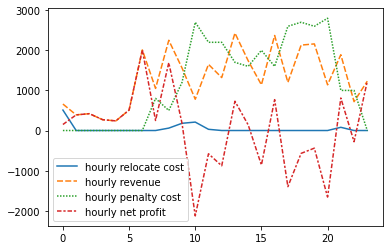

In [ ]:
s=Simulation(d)
s.run()
print(s.best_actions)
print(sum(s.hourly_profit_list))

In [ ]:
class NoPolicySim(Simulation):
    def __init__(self, demand):
        Simulation.__init__(self, demand)  # 此处修改了。如果类A的__init__方法需要传参，也需要传入对应的参数
        self.name = 'no_policy'

    def policy(self, index):
      return [0,0]

In period 0 ==========================
Bike stocks in stations A and B: 30,30
Unsatisfied demand from last period in stations A and B: 0,0
Demand in stations A and B: 5,4
We decide to relocate bikes in A and B: 0, 0
Number of bikes in the way from A and B: 0, 0
In period 1 ==========================
Bike stocks in stations A and B: 25,26
Unsatisfied demand from last period in stations A and B: 0,0
Demand in stations A and B: 2,3
We decide to relocate bikes in A and B: 0, 0
Number of bikes in the way from A and B: 5, 4
In period 2 ==========================
Bike stocks in stations A and B: 23,28
Unsatisfied demand from last period in stations A and B: 0,0
Demand in stations A and B: 4,2
We decide to relocate bikes in A and B: 0, 0
Number of bikes in the way from A and B: 2, 7
In period 3 ==========================
Bike stocks in stations A and B: 23,28
Unsatisfied demand from last period in stations A and B: 0,0
Demand in stations A and B: 3,1
We decide to relocate bikes in A and B: 0, 

-37320

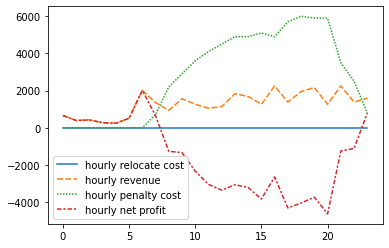

In [ ]:
nps=NoPolicySim(d)
nps.run()

In [ ]:
class DeterministicMyopicSim(Simulation):
    def __init__(self, demand,mean_demand, look_ahead_T=4):
        Simulation.__init__(self, demand)  # 此处修改了。如果类A的__init__方法需要传参，也需要传入对应的参数
        self.mean_demand=mean_demand
        self.look_ahead_T=look_ahead_T
        self.fix_a = 0
        self.fix_b = 0
        self.name = 'myopic_s'
        self.action=[]

    def policy(self, index):
      comb = []
      demand = copy.deepcopy(self.mean_demand[index:index + self.look_ahead_T])
      T_minus_demand_len=self.look_ahead_T-len(self.mean_demand[index:index + self.look_ahead_T])
      if T_minus_demand_len>0:
        for i in range(T_minus_demand_len):
          demand.append([0,0])
      #print(self.hourly_profit_list)
      m=LPSolver(demand)
      params_dict = self.get_params()
      params_dict['output'] = False
      m.set_params(**params_dict)
      self.best_actions=m.solve()
      #print(self.best_actions)
      return self.best_actions[0]

In period 0 ==========================
Bike stocks in stations A and B: 30,30
Unsatisfied demand from last period in stations A and B: 0,0
Demand in stations A and B: 5,4
We decide to relocate bikes in A and B: 0, 17
Number of bikes in the way from A and B: 0, 0
In period 1 ==========================
Bike stocks in stations A and B: 25,9
Unsatisfied demand from last period in stations A and B: 0,0
Demand in stations A and B: 2,3
We decide to relocate bikes in A and B: 0, 0
Number of bikes in the way from A and B: 5, 21
In period 2 ==========================
Bike stocks in stations A and B: 23,11
Unsatisfied demand from last period in stations A and B: 0,0
Demand in stations A and B: 4,2
We decide to relocate bikes in A and B: 0, 0
Number of bikes in the way from A and B: 2, 24
In period 3 ==========================
Bike stocks in stations A and B: 40,11
Unsatisfied demand from last period in stations A and B: 0,0
Demand in stations A and B: 3,1
We decide to relocate bikes in A and B: 0

990.0

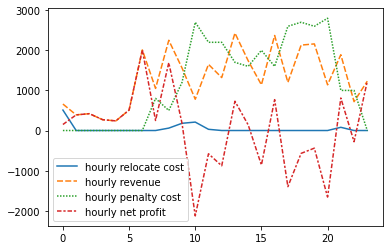

In [ ]:
deterministic_myopic_sim=DeterministicMyopicSim(d,d,24)
deterministic_myopic_sim.run()


In [ ]:
import copy
random.seed(1)
class StochasticMyopicSim(Simulation):
    def __init__(self, demand, mean_demand, sample_num, look_ahead_T=4):
        Simulation.__init__(self, demand)  # 此处修改了。如果类A的__init__方法需要传参，也需要传入对应的参数
        self.mean_demand = mean_demand
        self.fix_a = 0
        self.fix_b = 0
        self.name = 'myopic_s_with_s'
        self.sample_num = sample_num
        self.look_ahead_T = look_ahead_T
        self.action = []

    def policy(self, index):
        sample_score_list = []
        # sampling
        demand_samples = []
        for i in range(self.sample_num):
            demand_samples.append(self.generate_sample(
                copy.deepcopy(self.mean_demand[index:index + self.look_ahead_T]))
            )

        T_minus_demand_len = self.look_ahead_T - len(self.mean_demand[index:index + self.look_ahead_T])
        if T_minus_demand_len > 0:
            for i in range(T_minus_demand_len):
                for demand_sample in demand_samples:
                    demand_sample.append([0, 0])

        m = LPSolver(demand_samples, self.sample_num)
        params_dict = self.get_params()
        params_dict['output'] = False

        m.set_params(**params_dict)
        self.best_actions = m.solve()
        
        return self.best_actions[0]

    def generate_sample(self, demand):
        for row in range(len(demand)):
            for col in range(len(demand[row])):
                demand[row][col] = int(poisson.ppf(random.random(), mu=demand[row][col]))
        return demand

In period 0 ==========================
Bike stocks in stations A and B: 30,30
Unsatisfied demand from last period in stations A and B: 0,0
Demand in stations A and B: 5,4
We decide to relocate bikes in A and B: 0, 16
Number of bikes in the way from A and B: 0, 0
In period 1 ==========================
Bike stocks in stations A and B: 25,10
Unsatisfied demand from last period in stations A and B: 0,0
Demand in stations A and B: 2,3
We decide to relocate bikes in A and B: 0, 3
Number of bikes in the way from A and B: 5, 20
In period 2 ==========================
Bike stocks in stations A and B: 23,9
Unsatisfied demand from last period in stations A and B: 0,0
Demand in stations A and B: 4,2
We decide to relocate bikes in A and B: 0, 0
Number of bikes in the way from A and B: 2, 26
In period 3 ==========================
Bike stocks in stations A and B: 39,9
Unsatisfied demand from last period in stations A and B: 0,0
Demand in stations A and B: 3,1
We decide to relocate bikes in A and B: 2,

-1230.0

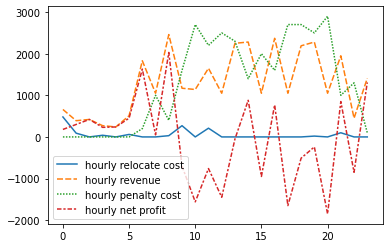

In [ ]:
stochastic_myopic_sim=StochasticMyopicSim(d,d,6,24)
stochastic_myopic_sim.run()

In [ ]:
class StochasticMyopicSimLHS(Simulation):
    def __init__(self, demand, mean_demand, sample_num, look_ahead_T=4):
        Simulation.__init__(self, demand)  # 此处修改了。如果类A的__init__方法需要传参，也需要传入对应的参数
        self.mean_demand = mean_demand
        self.fix_a = 0
        self.fix_b = 0
        self.name = 'myopic_s_lhs'
        self.sample_num = sample_num
        self.look_ahead_T = look_ahead_T
        self.action = []

    def policy(self, index):
        # sampling
        demand_samples =self.generate_sample(
            copy.deepcopy(self.mean_demand[index:index + self.look_ahead_T]),self.sample_num)

        T_minus_demand_len = self.look_ahead_T - len(self.mean_demand[index:index + self.look_ahead_T])
        if T_minus_demand_len > 0:
            for i in range(T_minus_demand_len):
                for demand_sample in demand_samples:
                    demand_sample.append([0, 0])

        m = LPSolver(demand_samples, self.sample_num)
        params_dict = self.get_params()
        params_dict['output'] = False

        m.set_params(**params_dict)
        self.best_actions = m.solve()
        self.actions.append(self.best_actions[0])
        return self.best_actions[0]

    def generate_sample(self,mean_demand,sample_num):
        lhd = lhs(len(mean_demand)*2, samples=sample_num)
        demand_samples=[]
        for i in range(sample_num):
            ind=0
            demand=[]
            for row in range(len(mean_demand)):
              demand.append([])
              for col in range(len(mean_demand[row])):
                demand[row].append(
                    int(poisson.ppf(lhd[i][ind],mu=mean_demand[row][col]))
                    )
                ind+=1
            demand_samples.append(demand)

        return demand_samples

In [ ]:
for ind,table in enumerate(demands):
  sms=StochasticMyopicSimLHS(table,d,6,24)
  sms.output=False
  sms.run()
  print('actions for %d' %ind)
  print(sms.actions)
  for ind, action in enumerate(sms.actions):
    print('%d o\'clock' %ind)
    print(action)
  print('total profit %f' %sum(sms.hourly_profit_list))

KeyError: ignored

In [ ]:
for ind,table in enumerate(demands):
  print(table)

len(demands)

[[5, 5], [1, 6], [3, 4], [0, 0], [0, 3], [0, 8], [17, 8], [13, 11], [25, 4], [16, 15], [19, 11], [15, 7], [22, 7], [17, 20], [12, 7], [6, 9], [16, 12], [9, 15], [15, 14], [11, 19], [10, 7], [7, 3], [5, 3], [1, 4]]
[[7, 8], [3, 3], [2, 1], [3, 0], [0, 2], [0, 1], [18, 12], [17, 7], [22, 8], [21, 7], [17, 11], [15, 6], [8, 4], [11, 19], [4, 15], [14, 9], [13, 16], [11, 20], [6, 24], [8, 18], [11, 5], [0, 4], [3, 2], [0, 3]]
[[8, 0], [1, 6], [3, 2], [0, 2], [1, 1], [0, 6], [16, 12], [22, 11], [19, 8], [14, 12], [22, 5], [11, 3], [16, 7], [8, 10], [7, 14], [6, 18], [5, 16], [10, 15], [10, 14], [8, 17], [12, 10], [2, 3], [7, 4], [2, 1]]
[[9, 5], [3, 7], [3, 5], [5, 1], [1, 3], [0, 5], [12, 12], [13, 12], [24, 10], [21, 15], [13, 11], [13, 7], [22, 6], [15, 13], [3, 15], [8, 14], [10, 17], [13, 16], [3, 18], [5, 20], [6, 10], [6, 5], [5, 2], [3, 4]]
[[8, 3], [1, 3], [3, 0], [2, 0], [2, 2], [1, 6], [19, 15], [18, 7], [19, 8], [11, 12], [13, 11], [10, 15], [17, 6], [21, 20], [3, 14], [13, 17],

10

In [ ]:
random.seed(1)
class SimulationRandom:
  def __init__(self,n_round,mean_demand):
    self.n_round=n_round
    self.mean_demand=mean_demand

  def generate_sample(self):
    demand=[]
    for row in range(len(self.mean_demand)):
      demand.append([])
      for col in range(len(self.mean_demand[row])):
        demand[row].append(int(poisson.ppf(random.random(),mu=self.mean_demand[row][col])))
    return demand

  def run(self):
    n_scores=[]
    gaps=[]
    # r_scores=[]
    for i in range(self.n_round):
      demand=self.generate_sample()
      no_policy_sim=NoPolicySim(demand)

      sim=Simulation(demand)

      deterministic_myopic_sim=DeterministicMyopicSim(demand,self.mean_demand,24)

      stochastic_myopic_sim=StochasticMyopicSim(demand,self.mean_demand,6,24)

      stochastic_myopic_sim_lhs=StochasticMyopicSimLHS(demand,self.mean_demand,6,24)

      scores,gap=self.run_model(no_policy_sim,sim,deterministic_myopic_sim,stochastic_myopic_sim,stochastic_myopic_sim_lhs)
      print(scores)
      n_scores+=scores
      gaps+=gap
      # copy_scores=copy.deepcopy(scores)
      # for score in copy_scores:
      #   score.append(i)
      # r_scores+=copy_scores
    n_scores=pd.DataFrame(n_scores,columns=['model','profit'])
    gaps=pd.DataFrame(gaps,columns=['model','gap'])
    # r_scores=pd.DataFrame(r_scores,columns=['model','profit','round'])
    # sns.lineplot(data=r_scores,x='model',y='profit',hue='round')
    self.box(n_scores,gaps)

  def run_model(self,*model):
    
    temp=0
    for i in model:
      if i.name=='perfect_info':
        i.output=False
        i.run()
        temp=sum(i.hourly_profit_list)
    score_l=[]
    gaps=[]
    for i in model:
      if i.name!='perfect_info':
        i.output=False
        i.run()
      score_l.append([i.name,sum(i.hourly_profit_list)])
      gaps.append([i.name,sum(i.hourly_profit_list)-temp])
    return score_l,gaps

  def box(self,n_scores,gaps):
    sns.boxplot(data=n_scores,x='model',y='profit')
    for i in ['no_policy', 'perfect_info','myopic_s','myopic_s_with_s','myopic_s_lhs']:
      print(i+' scores')
      print(n_scores[n_scores.model==i].describe())
    for i in ['no_policy', 'perfect_info','myopic_s','myopic_s_with_s','myopic_s_lhs']:
      print(i+' gaps')
      print(gaps[gaps.model==i].describe())
    
  def grid_search(self,ran,demand):
    models=[]
    for i in range(ran[0][0],ran[0][1]):
      for j in range(ran[1][0],ran[1][1]):
        model=StochasticMyopicSimLHS(demand,self.mean_demand,i,j)
        model.output=False
        model.name+=(str(i)+','+str(j))
        models.append(model)
    return models 

  # def generate_sample(self):
  #   lhd = lhs(48, samples=self.n_round)
  #   demand_samples=[]
  #   for i in range(self.n_round):
  #     ind=0
  #     demand=[]
  #     for row in range(len(self.mean_demand)):
  #       demand.append([])
  #       for col in range(len(self.mean_demand[row])):
  #         demand[row].append(
  #             int(poisson.ppf(lhd[i][ind],mu=self.mean_demand[row][col]))
  #             )
  #         ind+=1
  #     demand_samples.append(demand)
  #   return demand_samples

In [ ]:
sr=SimulationRandom(100,d)
sr.run()

AttributeError: ignored